In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

sklearn.show_versions()

import tensorflow as tf


System:
    python: 3.12.5 (v3.12.5:ff3bc82f7c9, Aug  7 2024, 05:32:06) [Clang 13.0.0 (clang-1300.0.29.30)]
executable: /Users/taktakro/Desktop/SmallProjects_PY/venv3.12/bin/python
   machine: macOS-15.3.2-arm64-arm-64bit

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0.1
   setuptools: 78.1.0
        numpy: 2.1.3
        scipy: 1.15.2
       Cython: None
       pandas: None
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: libomp
       filepath: /Users/taktakro/Desktop/SmallProjects_PY/venv3.12/lib/python3.12/site-packages/sklearn/.dylibs/libomp.dylib
        version: None


In [148]:
np.exp(0)


np.float64(1.0)

In [149]:
lr0 = 10

In [150]:
for epoch in range(1,6):
    lr =lr0 * np.exp(-0.9* (epoch))
    print(lr)

4.065696597405991
1.6529888822158654
0.6720551273974975
0.2732372244729256
0.11108996538242306


In [151]:
import tensorflow as tf 
import keras
print (tf.__version__)
print(keras.__version__)

2.19.0
3.9.1


# Regression

In [152]:
data = make_regression(n_samples=1000, n_features=5,noise=0.2, random_state=42)

In [153]:
x = data[0]

In [154]:
y = data[1]

In [155]:
x[0],y[0]

(array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449]),
 np.float64(74.8638525346159))

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [160]:
x_train.shape

(800, 5)

In [161]:
y_train.shape

(800,)

In [162]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(5,)),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dense(units=1,activation='linear')
    ]
)

In [163]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(5,)))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [165]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
loss =tf.losses.MeanSquaredError()
opt=tf.optimizers.Adam()
model.compile(loss=loss,optimizer=opt)

In [167]:
model.fit(x_train, y_train,validation_split=.1, epochs=200, batch_size=50)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4358.8726 - val_loss: 4032.6985
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4264.0469 - val_loss: 4020.5493
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4454.9990 - val_loss: 4006.2358
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4244.7051 - val_loss: 3988.6028
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3951.7019 - val_loss: 3965.4546
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3828.4551 - val_loss: 3936.1284
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3947.5447 - val_loss: 3899.8945
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3965.3726 - val_loss: 3855.1431
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3970.9343 - val_loss: 3799.0142
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3592.5137 - val_loss: 3731.2798
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3721.2578 - val_loss: 3647.19

In [168]:
model.evaluate(x_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 5.2823


5.313230037689209

In [169]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3941


7.4347686767578125

In [170]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [171]:
y_pred.shape

(200, 1)

In [172]:
y_test.shape

(200,)

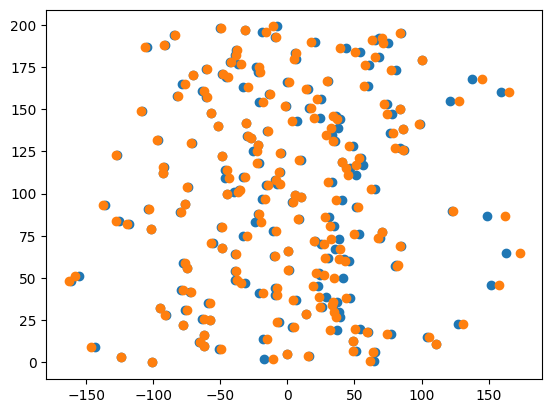

In [173]:
plt.scatter(y_pred, range(200))
plt.scatter(y_test,range(200))
plt.show()

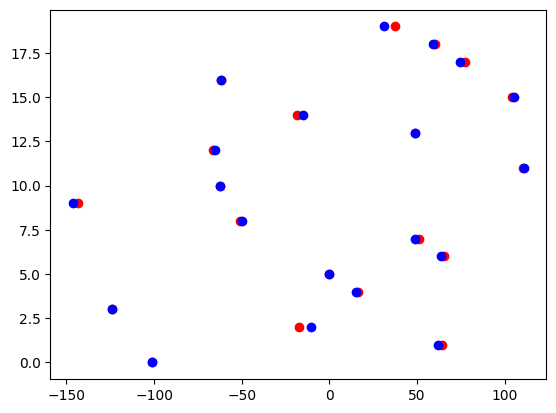

In [174]:
plt.scatter(y_pred[:20], range(20), color='red')
plt.scatter(y_test[:20],range(20), color='blue')
plt.show()

# Classification 

In [175]:
from keras.datasets import fashion_mnist

In [176]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [177]:
x_train.shape

(60000, 28, 28)

In [178]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

In [ ]:
class_name = {
    0 : 'T-shirt/top',
    1 : 'Trouser',   
    2 : 'Pullover',    
    3 : 'Dress',       
    4 : 'Coat',       
    5 : 'Sandal',      
    6 : 'Shirt',      
    7 : 'Sneaker',     
    8 : 'Bag',        
    9 : 'Ankle boot'  
}

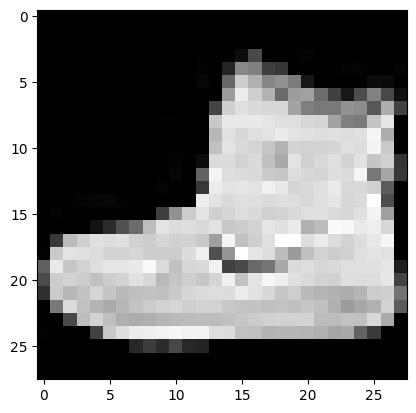

Ankle boot


In [180]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(class_name[y_train[0]])

In [181]:
y_train[0]

np.uint8(9)

In [182]:
x_test.shape

(10000, 28, 28)

In [183]:

y_test.shape

(10000,)

In [184]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [185]:
x_train = x_train/255
x_test = x_test/255

In [186]:
x_train.max(), x_test.max(), y_train, y_test

(np.float64(1.0),
 np.float64(1.0),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [187]:
# make one hot

from keras.utils import to_categorical

In [188]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [189]:
from keras.layers import Dense, Input, Flatten
from keras.models import Sequential

In [190]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [191]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
(128*128)+128


16512

In [221]:
100480+16512+1290

118282

In [192]:
loss = tf.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy()
model.compile(loss=loss, optimizer=opt, metrics=[metric])

In [193]:
model.fit(x_train, y_train, validation_split=.2, epochs=50, batch_size=50)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.7716 - loss: 0.6565 - val_categorical_accuracy: 0.8472 - val_loss: 0.4183
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8601 - loss: 0.3825 - val_categorical_accuracy: 0.8607 - val_loss: 0.3848
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8767 - loss: 0.3374 - val_categorical_accuracy: 0.8725 - val_loss: 0.3537
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8816 - loss: 0.3149 - val_categorical_accuracy: 0.8681 - val_loss: 0.3558
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8950 - loss: 0.2887 - val_categorical_accuracy: 0.8832 - val_loss: 0.3223
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8975 - loss: 0.2752 - val_categorical_accuracy: 0.8826 - val_loss: 0.3406
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9000 - los

In [194]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - categorical_accuracy: 0.8873 - loss: 0.6888


[0.6563602089881897, 0.8891000151634216]

In [195]:
y_pred = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [196]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


In [197]:
y_pred[0], y_pred[0].argmax(), y_train[0].argmax()

(array([2.1856778e-08, 5.8056070e-08, 1.5528354e-06, 4.4593320e-17,
        2.2528531e-12, 4.4135760e-07, 3.0315542e-10, 6.1988578e-07,
        1.6690012e-11, 9.9999726e-01], dtype=float32),
 np.int64(9),
 np.int64(9))

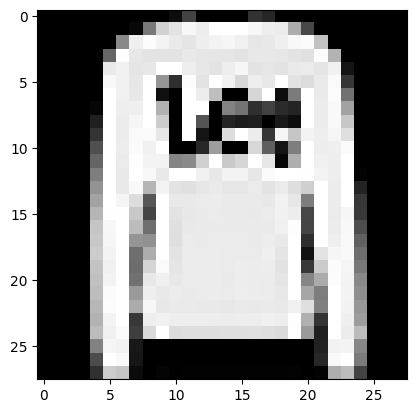

true:Pullover
pred:Pullover


In [198]:
index = 1
plt.imshow(x_test[index], cmap='gray')
plt.show()
print(f'true:{class_name[y_test[index].argmax()]}')
print(f'pred:{class_name[y_pred[index].argmax()]}')

In [199]:
from keras.layers import Conv2D, MaxPool2D

In [201]:
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [202]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, validation_split=.2, epochs=50, batch_size=50)

In [208]:
loss = tf.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
metrics = tf.metrics.CategoricalAccuracy()
model.compile(loss=loss, optimizer=opt, metrics=[metric])


In [209]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


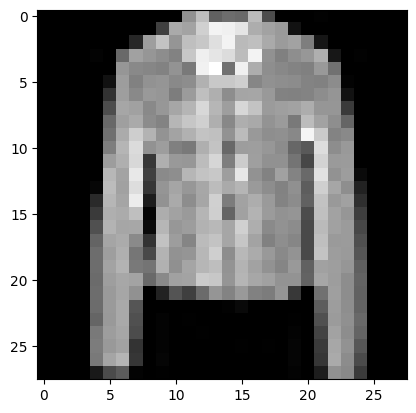

true:Coat
pred:Pullover


In [210]:
index = 10
plt.imshow(x_test[index], cmap='gray')
plt.show()
print(f'true:{class_name[y_test[index].argmax()]}')
print(f'pred:{class_name[y_pred[index].argmax()]}')